In [71]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow


In [72]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [73]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


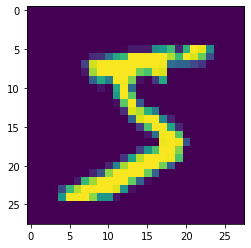

In [75]:
imshow(X_train[0])

In [80]:
y_train[0]

5

In [77]:
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

In [78]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [64]:
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [83]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes=None)
y_test = keras.utils.to_categorical(y_test,num_classes=None)

In [84]:
y_train.shape

(60000, 10)

In [85]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [86]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
batch_size = 128
num_classes = 10
epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 29us/sample - loss: 3.1593 - accuracy: 0.2532 - val_loss: 1.7840 - val_accuracy: 0.3433
Epoch 2/10
48000/48000 [==============================] - 1s 24us/sample - loss: 1.4336 - accuracy: 0.5025 - val_loss: 1.1998 - val_accuracy: 0.5827
Epoch 3/10
48000/48000 [==============================] - 2s 37us/sample - loss: 1.0646 - accuracy: 0.6474 - val_loss: 0.9204 - val_accuracy: 0.7059
Epoch 4/10
48000/48000 [==============================] - 1s 19us/sample - loss: 0.8454 - accuracy: 0.7316 - val_loss: 0.7716 - val_accuracy: 0.7487
Epoch 5/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.7088 - accuracy: 0.7768 - val_loss: 0.6597 - val_accuracy: 0.8188
Epoch 6/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5801 - accuracy: 0.8342 - val_loss: 0.5344 - val_accuracy: 0.8553
Epoch 7/10
48000/48000 [==============================] 